In [5]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import statsmodels.api as sm
#from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

In [6]:
df= pd.read_csv('superstore_data.csv')

#Ramdom Sampling and reindexing the data
#df=df.sample(frac=0.01, replace=True, random_state=1)

In [8]:
#Checking the missing values in the dataset
df.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
df.describe(include='all')

Id   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2240           2240    2216.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52247.251354   
std      3246.662198    11.984069         NaN            NaN   25173.076661   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35303.000000   
50%      5458.500000  1970.000000         NaN            NaN   51381.500000   
75%      8427.750000  1977.000000         NaN            NaN   68522.000000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   

            Kidhome     Teenhome Dt_Customer      Recency     MntWines  ...  \
count   2240.000000  2240.000000        2240  2240.000000  2240.000000  ...   
unique          NaN          NaN         663          NaN          NaN  ...   
top             NaN          NaN   8/31/2012          NaN          NaN  ...   
freq            NaN          NaN          12          NaN          NaN  ...   
mean       0.444196     0.506250         NaN    49.109375   303.935714  ...   
std        0.538398     0.544538         NaN    28.962453   336.597393  ...   
min        0.000000     0.000000         NaN     0.000000     0.000000  ...   
25%        0.000000     0.000000         NaN    24.000000    23.750000  ...   
50%        0.000000     0.000000         NaN    49.000000   173.500000  ...   
75%        1.000000     1.000000         NaN    74.000000   504.250000  ...   
max        2.000000     2.000000         NaN    99.000000  1493.000000  ...   

        MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count       2240.000000       2240.000000   2240.000000        2240.000000   
unique              NaN               NaN           NaN                NaN   
top                 NaN               NaN           NaN                NaN   
freq                NaN               NaN           NaN                NaN   
mean          37.525446         27.062946     44.021875           2.325000   
std           54.628979         41.280498     52.167439           1.932238   
min            0.000000          0.000000      0.000000           0.000000   
25%            3.000000          1.000000      9.000000           1.000000   
50%           12.000000          8.000000     24.000000           2.000000   
75%           50.000000         33.000000     56.000000           3.000000   
max          259.000000        263.000000    362.000000          15.000000   

        NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count       2240.000000          2240.000000        2240.000000   
unique              NaN                  NaN                NaN   
top                 NaN                  NaN                NaN   
freq                NaN                  NaN                NaN   
mean           4.084821             2.662054           5.790179   
std            2.778714             2.923101           3.250958   
min            0.000000             0.000000           0.000000   
25%            2.000000             0.000000           3.000000   
50%            4.000000             2.000000           5.000000   
75%            6.000000             4.000000           8.000000   
max           27.000000            28.000000          13.000000   

        NumWebVisitsMonth     Response     Complain  
count         2240.000000  2240.000000  2240.000000  
unique                NaN          NaN          NaN  
top                   NaN          NaN          NaN  
freq                  NaN          NaN          NaN  
mean             5.316518     0.149107     0.009375  
std              2.426645     0.356274     0.096391  


In [15]:
#Seeing the classes in the string variables
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

Descriptive Analysis

In [19]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

0    1906
1     334
Name: Response, dtype: int64
0    85.089286
1    14.910714
Name: Response, dtype: float64


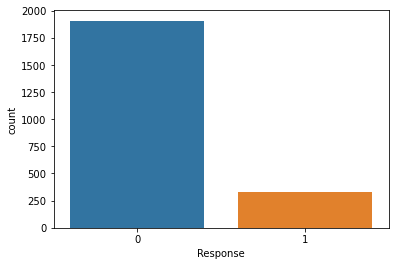

In [17]:
sns.countplot(data=df, x='Response')
print(df.Response.value_counts())
print(df.Response.value_counts(normalize=True)*100)
#print(df.Repsonse.value_counts()/df.Repsonse.count()*100)

Graduation    50.312500
PhD           21.696429
Master        16.517857
2n Cycle       9.062500
Basic          2.410714
Name: Education, dtype: float64


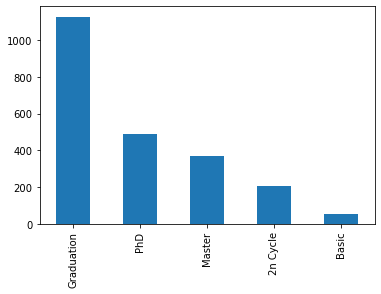

In [20]:
#sns.countplot(data=df, x='deck_risk')
df.Education.value_counts().plot.bar()

print(df.Education.value_counts()/df.Education.count()*100)

Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
YOLO         0.089286
Absurd       0.089286
Name: Marital_Status, dtype: float64


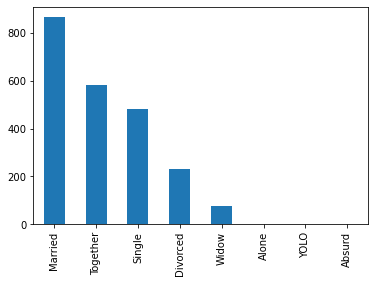

In [21]:
#sns.countplot(data=df, x='deck_risk')
df.Marital_Status.value_counts().plot.bar()

print(df.Marital_Status.value_counts()/df.Marital_Status.count()*100)

<AxesSubplot:xlabel='Income', ylabel='Count'>

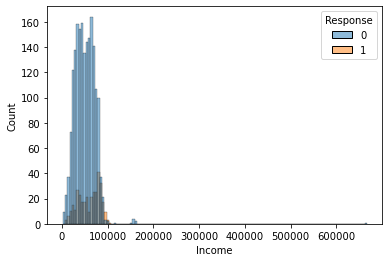

In [34]:
sns.histplot(df,x='Income',hue='Response')

<AxesSubplot:xlabel='Recency', ylabel='Count'>

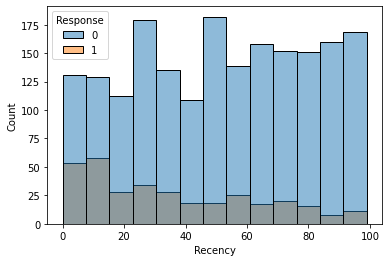

In [35]:
sns.histplot(df,x='Recency',hue='Response')

In [ ]:
sns.histplot(df,x='Income',hue='Response')

<AxesSubplot:xlabel='Response', ylabel='Income'>

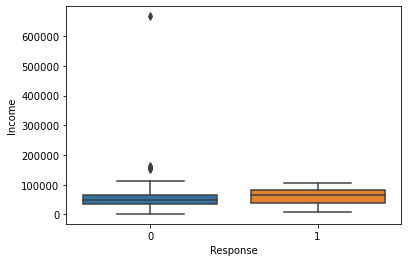

In [24]:

sns.boxplot(x = 'Response', y= 'Income', data= df)

<AxesSubplot:xlabel='Response', ylabel='NumWebVisitsMonth'>

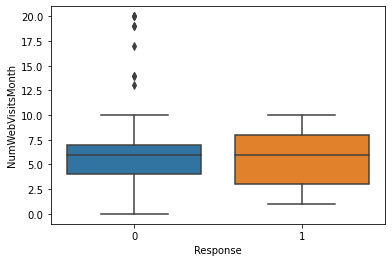

In [37]:
sns.boxplot(x = 'Response', y= 'NumWebVisitsMonth', data= df)

Bivariate Analysis

In [29]:
#Chi-square tests for categorical predictors with outcome
catv= [ 'Marital_Status', 'Education']
from scipy.stats import chi2_contingency
for i in catv:
    tab =pd.crosstab(df.Response, df[i], normalize="columns")#normalize 'all', 'index' for rows, 'columns'
    print(tab)
    stats, p, dof, expected = chi2_contingency(tab)
    if p<=0.05:
        print("There is significant association between Response and "+i+".")
    else:
        print("There is no significant association between Response and "+i+".")
        print(" ")

Marital_Status  Absurd     Alone  Divorced   Married    Single  Together  \
Response                                                                   
0                  0.5  0.666667  0.793103  0.886574  0.779167  0.896552   
1                  0.5  0.333333  0.206897  0.113426  0.220833  0.103448   

Marital_Status     Widow  YOLO  
Response                        
0               0.753247   0.5  
1               0.246753   0.5  
There is no significant association between Response and Marital_Status.
 
Education  2n Cycle     Basic  Graduation    Master       PhD
Response                                                     
0          0.891626  0.962963    0.865129  0.845946  0.792181
1          0.108374  0.037037    0.134871  0.154054  0.207819
There is no significant association between Response and Education.
 


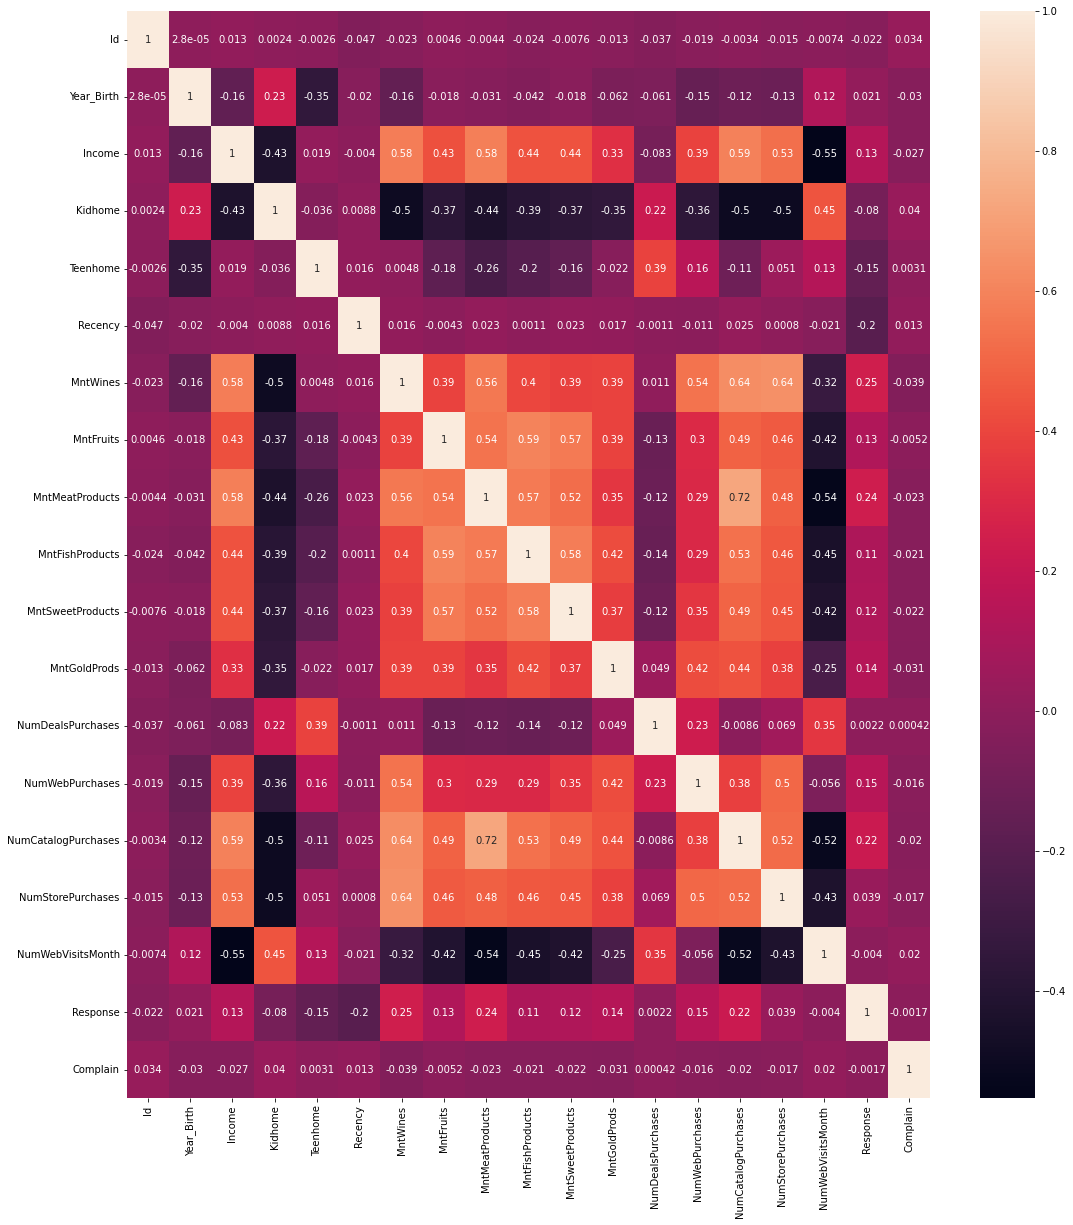

In [30]:
#Heatmap with Correlation Coefficients
plt.figure(figsize = (18,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Figure size 1296x1440 with 0 Axes>

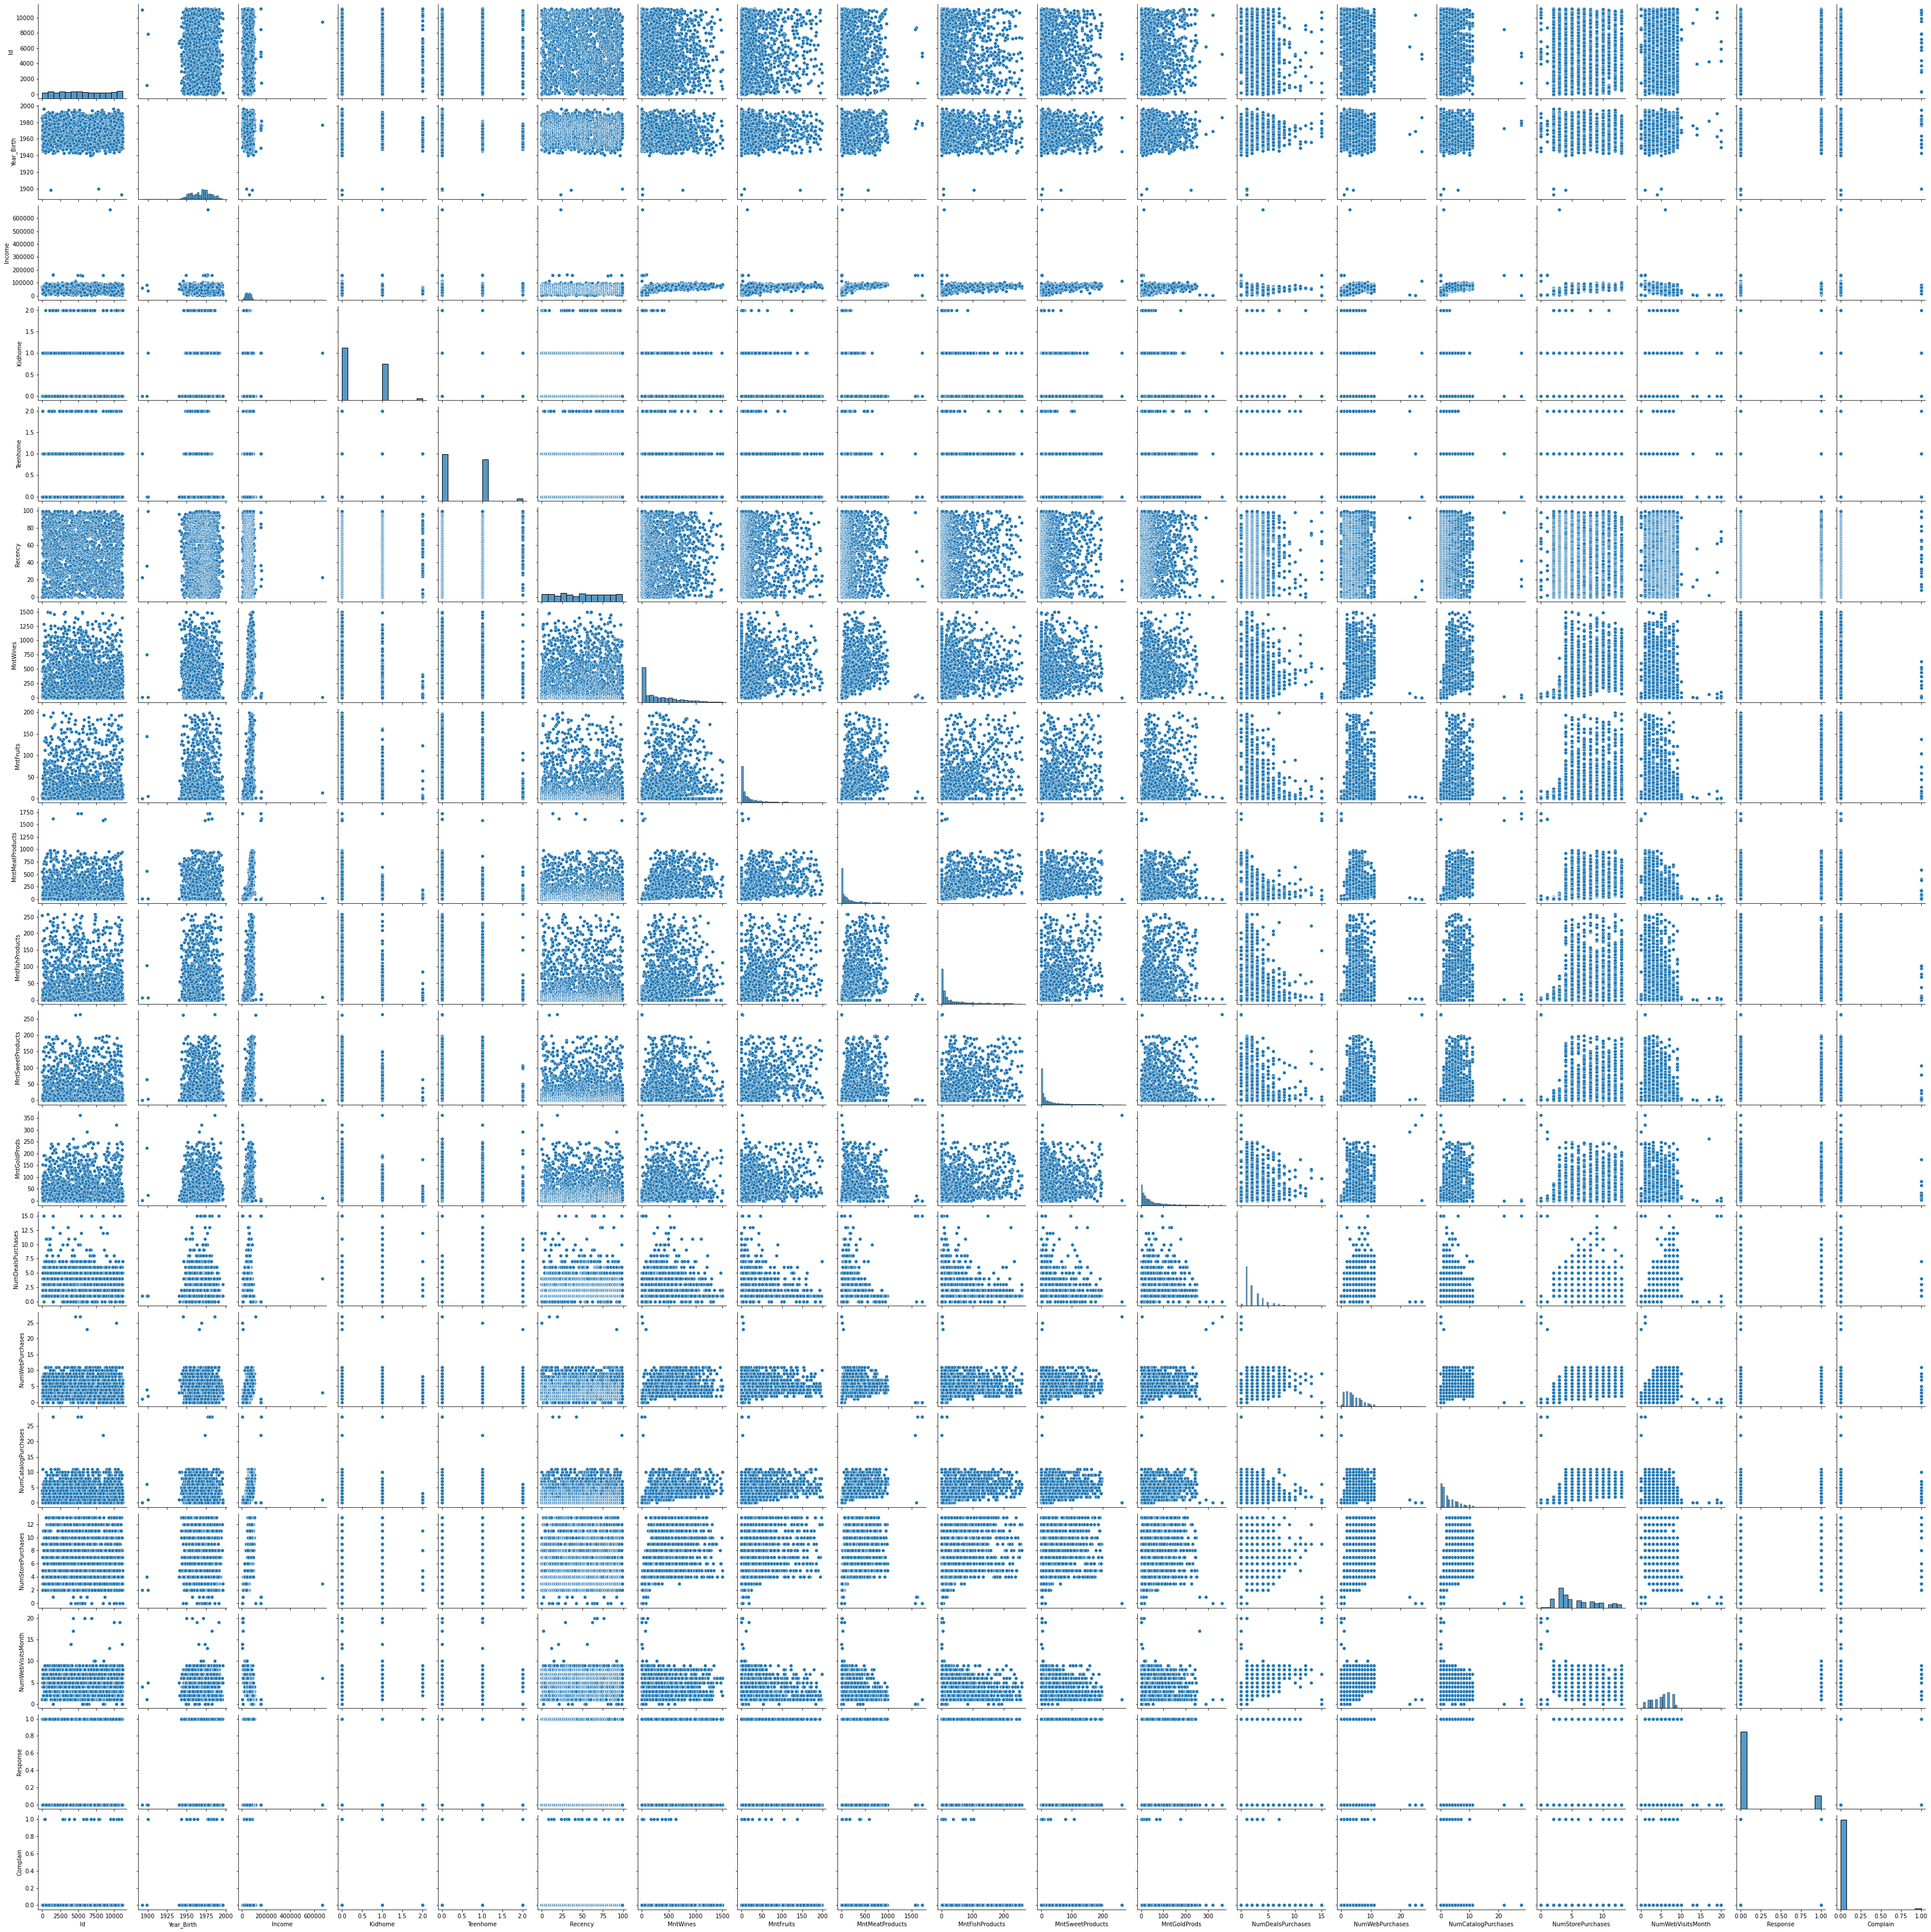

In [32]:
plt.figure(figsize = (18,20))
sns.pairplot(df)
plt.show()

In [39]:
# t-tests to determine the mean difference of each of continous variables between status of backorders

conv= ['Year_Birth', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


In [40]:
group1 = df[df['Response']==1]
group2 = df[df['Response']==0]



In [41]:
from scipy.stats import ttest_ind

for i in conv:
    t, p = ttest_ind(group1[i], group2[i])
    if p<=0.05:
        print("There is significant mean difference of "+i+" between the status of the responses")
    else:
        print("There is no significant mean difference of "+i+" between the status of the responses")

There is no significant mean difference of Year_Birth between the status of the responses
There is no significant mean difference of Income between the status of the responses
There is significant mean difference of Kidhome between the status of the responses
There is significant mean difference of Teenhome between the status of the responses
There is significant mean difference of Recency between the status of the responses
There is significant mean difference of MntWines between the status of the responses
There is significant mean difference of MntFruits between the status of the responses
There is significant mean difference of MntMeatProducts between the status of the responses
There is significant mean difference of MntFishProducts between the status of the responses
There is significant mean difference of MntSweetProducts between the status of the responses
There is significant mean difference of MntGoldProds between the status of the responses
There is no significant mean diffe

Multiple Logistic Regression

In [7]:
#Dummy Coding
df= pd.get_dummies(df
               ,columns = ['Education','Marital_Status']
               ,drop_first = True
               )

In [8]:
df = df.dropna()
y_data = df['Response']
x_data = df[[ 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO',
        'Complain']]



print(x_data.shape)
print(y_data.shape)

(2216, 30)
(2216,)


In [9]:
df.Income.fillna(int(df['Income'].median()), inplace=True)

In [10]:
df.isna().sum()

Id                         0
Year_Birth                 0
Income                     0
Kidhome                    0
Teenhome                   0
Dt_Customer                0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
Response                   0
Complain                   0
Education_Basic            0
Education_Graduation       0
Education_Master           0
Education_PhD              0
Marital_Status_Alone       0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
Marital_Status_YOLO        0
dtype: int64

In [11]:
#Ordinary logistic regression

#add constant to predictor variables
x_data = sm.add_constant(x_data)

#fit linear regression model
model = sm.OLS(y_data, x_data).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Response   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.440e+28
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:38:46   Log-Likelihood:                 66770.
No. Observations:                2216   AIC:                        -1.335e+05
Df Residuals:                    2186   BIC:                        -1.333e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -







Machine Learning to predict the response

In [12]:
#MinMax scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_data)
sx_data = scaler.fit_transform(x_data)
mm_df = pd.DataFrame(sx_data, columns=x_data.columns)

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    mm_df,
    y_data,
    test_size=0.2,
    random_state=2022,
    stratify=y_data) # 클래스 비율을 동일하게 분할한다

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1772, 31) (1772,)
(444, 31) (444,)


In [15]:
# Train the random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
baseline_model = rf.fit(x_train, y_train)
baseline_prediction = baseline_model.predict(x_test)
# Check the model performance
print(classification_report(y_test, baseline_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00        67

    accuracy                           1.00       444
   macro avg       1.00      1.00      1.00       444
weighted avg       1.00      1.00      1.00       444



In [23]:

#Multiple linear Perceptron Model
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(max_iter=300, random_state=42)
mlp_model = mlp.fit(x_train, y_train)
mlp_prediction = mlp_model.predict(x_test)
# Check the model performance
print(classification_report(y_test, mlp_prediction))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00        67

    accuracy                           1.00       444
   macro avg       1.00      1.00      1.00       444
weighted avg       1.00      1.00      1.00       444

